# 02.08 - Sorting Arrays

Sorting algorithms are a class of algorithms with a common objective: sorting values in a list or array.

For example, here is a _selection sort_, which repeatedly finds the minimum value from a list, and makes swaps until the list is sorted:

In [2]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Altough simple, this algorithm is not the most efficient computing in O[N^2].

### Fast sorting in NumPy: <code>np.sort</code> and <code>np.argsort</code>

Although Python has built-in <code>sort</code>, NumPy <code>np.sort</code> is more efficient. By default, it uses a _quicksort_ algorithm working in O[NlogN] time.

Example:

In [4]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

To sort _in-place_, you can use the <code>sort</code> method:

In [6]:
x.sort()
print(x)

[1 2 3 4 5]


Another useful function is <code>argsort</code>, which returns the indexes of the sorted array:

In [7]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


### Sorting rows and columns

As usual, we can pass the optional arg <code>axis</code> to work only on one axis:

In [8]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [9]:
# sort columns
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [10]:
# sort rows
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Partial Sorts: Partitioning

To find only the smallest _K_ values in the array, we can use the <code>np.partition</code> function.
Taking an array and a number, it returns the array partitioned (divided) in two parts: the first K values are the smallest and are on the left, and the others on the right - all in random order. 

In [22]:
x = np.array([7, 2, 3, 1, 6, 5, 4, 8, 11, 13])
np.partition(x, 4)

array([ 1,  3,  2,  4,  5,  6,  7,  8, 11, 13])

In [28]:
np.partition(X, 2, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [29]:
np.argpartition(X, 2, axis=0)

array([[1, 3, 3, 3, 2, 3],
       [3, 2, 2, 1, 1, 1],
       [0, 0, 1, 2, 0, 2],
       [2, 1, 0, 0, 3, 0]], dtype=int32)

### Example: k-Nearest Neighbors

We can use the <code>argsort</code> along multiple axes to find the nearest neighbors of each point in a set. 

In [30]:
X = rand.rand(10, 2)

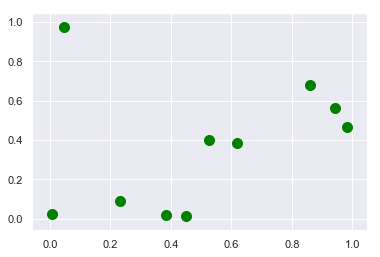

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100, facecolor='green');

Now we'll compute the squared distance between each pair of points.

In [35]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [36]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [37]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

If what we are doing is correct, the diagonal of this matrix (i.e., the set of distances between each point and itself) should be all zero:

In [38]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

**Note**: The first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself.

In [39]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [40]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

We can now visualize this network of neighbors, using lines to connect the each point to its K nearest neighbors:

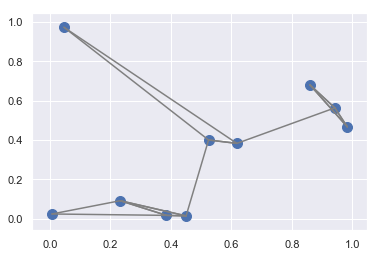

In [41]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='grey')